In [ ]:
import torch
from pathlib import Path
from huggingface_hub import notebook_login
from diffusers import StableDiffusionPipeline
from random import choice
from PIL import Image

In [ ]:
if not (Path.home() / '.huggingface' / 'token').exists(): notebook_login()

In [ ]:
model_string_v2 = 'stabilityai/stable-diffusion-2-1-base'
pipe = StableDiffusionPipeline.from_pretrained(model_string_v2, revision="fp16", torch_dtype=torch.float16).to("cuda")

In [ ]:
art_styles = ["anime", "oil painting", "drawing", "water color painting", "cartoon", "digital illustration",
              "disney animation studios", "pixar 3-d animation"]
genres = ["steampunk", "science fiction", "film noir", "fantasy", "90s", "80s", "70s", "60s", "50s", "western"]
pallettes = ["cool colors", "warm colors", "sepia", "black and white", "cell shaded"]
misc_parameters = ["rule of threes", "golden ratio", "4k resolution", "trending on deviantart"]

audience_prompt = "insert a string here"  # Let's just hardcode an example for now

In [ ]:
def pick_two(iterable):
    a = choice(iterable)
    b = choice(iterable)
    if a == b:
        return pick_two(iterable)
    else:
        return f"{a} and {b}"

In [ ]:
def image_gen(a_string):
    audience_prompt = a_string
    pipe.enable_attention_slicing()

    prompt = f'A multi panel {str(choice(genres))} {str(choice(art_styles))} dramatic image following the parameters of {str(pick_two(misc_parameters))} inspired by the quote "{audience_prompt}"'
    print(prompt)
    results = pipe( prompt=prompt, height=None, width=None, num_inference_steps=50, guidance_scale=7.5, num_images_per_prompt=1, output_type='pil', return_dict=True, callback=None,
                    negative_prompt="""mutilated fingers, twisted fingers, deformed fingers, racism, sexism, homophobia, china, chinese, communism,
                    communist party, xi jinping, mao zedong, han chinese, taiwan, kmt, guomindang, kuomintang, penis, vagina, human genetalia, sex, murder, rape,
                    tibet, pixelated, pixelation, blur, blurry, static, non-objective, abstract, tian'an men square, hong kong, protest, covid, covid-19,
                    xinjiang, uyghur, uighur, muslim, islam, islamic, slaves, slavery, israel, jews, holocaust, distorted face, blurred face, warped face, asymmetrical body""")

    return results.images

In [ ]:
def image_grid(imgs, rows, cols):
    w,h = imgs[0].size
    grid = Image.new('RGB', size=(cols*w, rows*h))
    for i, img in enumerate(imgs): grid.paste(img, box=(i%cols*w, i//cols*h))
    return grid

A multi panel 60s digital illustration dramatic image following the parameters of trending on deviantart and 4k resolution inspired by the quote "I had hotpot last nigght, and I even smuggled my alcohol free beer in. Then I ordered three soda waters."


  0%|          | 0/50 [00:00<?, ?it/s]

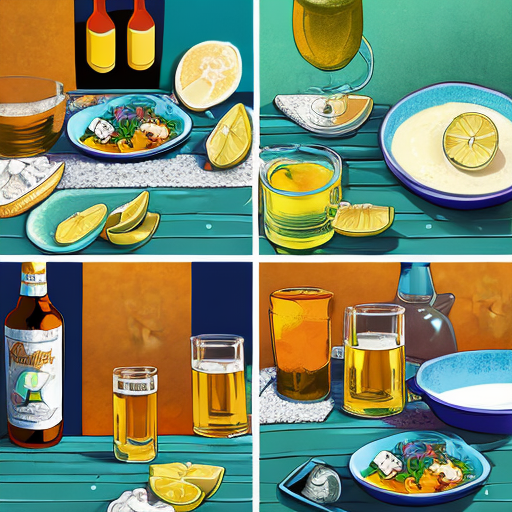

In [11]:
image_grid(image_gen("I had hotpot last nigght, and I even smuggled my alcohol free beer in. Then I ordered three soda waters."),1,1)